In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading csv file and extracting class column to y.
data = pd.read_excel("/content/drive/MyDrive/AI/Without time/10months.xlsx")
df = pd.DataFrame(data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Logistic Regression

Test accuracy: 0.7166053921568627
F1 score: 0.2779078844652615
Precision: 0.6137931034482759
AUC score: 0.805724907360259


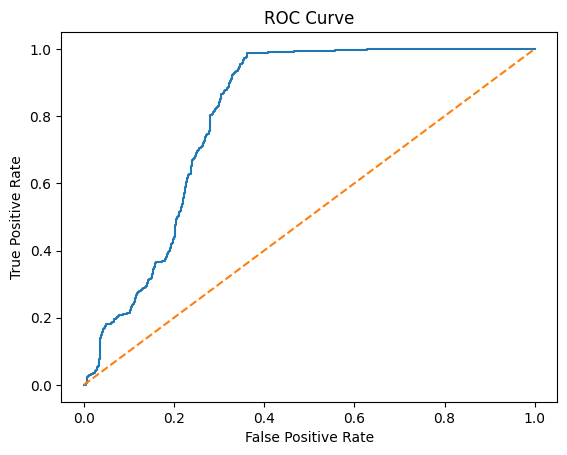

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.4, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Test the model on the testing data
accuracy = logreg.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Calculate the F1 score and precision
y_pred = logreg.predict(X_test)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='binary', zero_division=1)
print(f'F1 score: {f1}')
print(f'Precision: {precision}')

# Calculate the ROC curve and AUC score
y_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC score: {auc}')

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.4, random_state=42)

# # Create a logistic regression model
# logreg = LogisticRegression()

# # Train the model on the training data
# logreg.fit(X_train, y_train)

# # Test the model on the testing data
# accuracy = logreg.score(X_test, y_test)
# print(f'Test accuracy: {accuracy}')

SVM Linear

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

# Create an SVM model with a linear kernel
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Test the model on the testing data
accuracy = svm.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')

SVM RBF

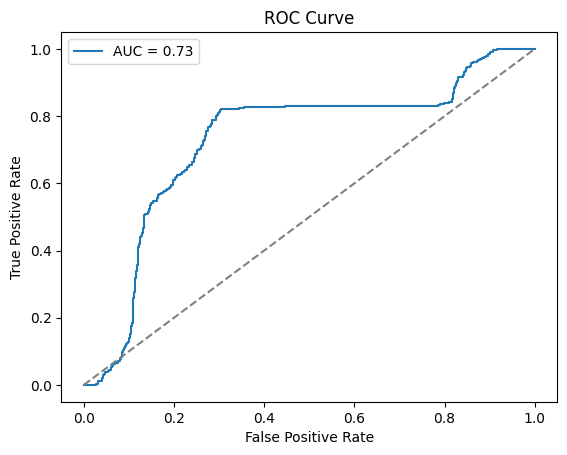

F1 score: 0.00
Precision: 1.00
Test accuracy: 0.7028186274509803
AUC score: 0.73


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

# Create an SVM model with a radial basis function (RBF) kernel
svm = SVC(kernel='rbf', probability=True)

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='binary', zero_division=1)

# Calculate the predicted probabilities for the test set
y_prob = svm.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'F1 score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Test accuracy: {svm.score(X_test, y_test)}')
print(f'AUC score: {auc:.2f}')

SVM Poly

Test accuracy: 0.7028186274509803


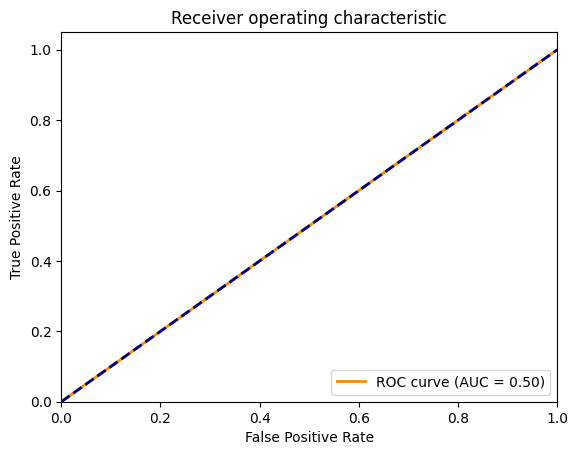

AUC score: 0.5


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

# Create an SVM model with a polynomial kernel
svm = SVC(kernel='poly')

# Train the model on the training data
svm.fit(X_train, y_train)

# Test the model on the testing data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = svm.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f'AUC score: {roc_auc}')

Gaussian

Test accuracy: 0.6170343137254902
AUC score: 0.6781644630996145


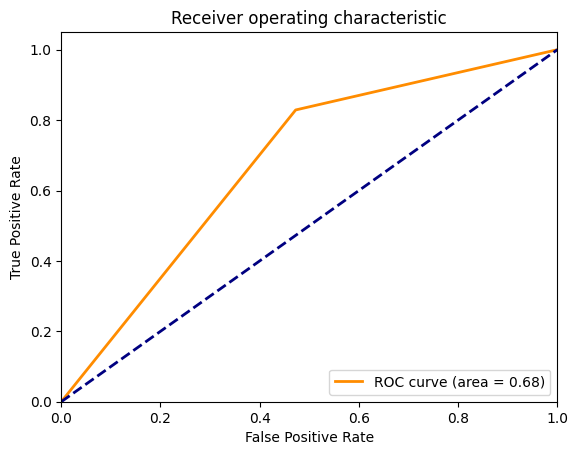

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes model
bayes = GaussianNB()

# Train the model on the training data
bayes.fit(X_train, y_train)

# Test the model on the testing data
y_pred = bayes.predict(X_test)

# Calculate accuracy
accuracy = bayes.score(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc}')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ANN

51/51 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9308
Test accuracy: 0.9307597875595093
51/51 [==============================] - 0s 1ms/step
AUC score: 0.9800142010983381


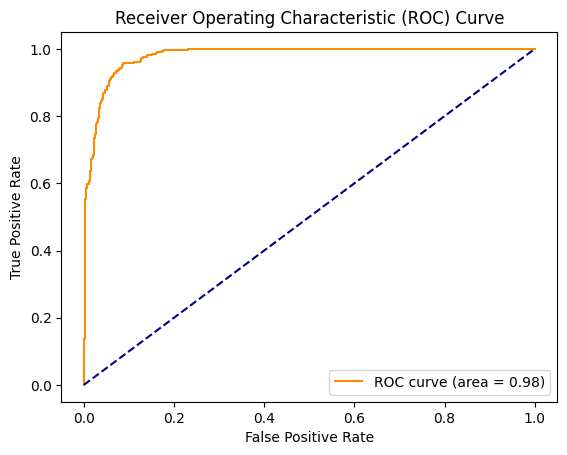

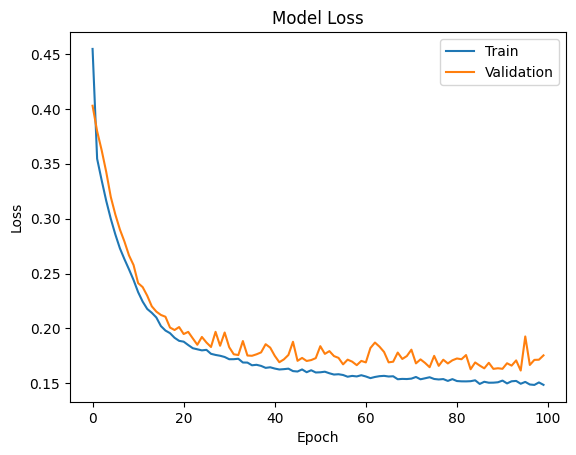

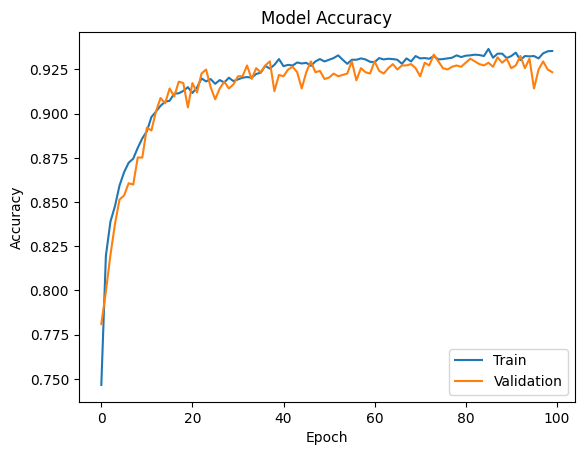

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Load the dataset into a pandas dataframe
#data = pd.read_csv('your_dataset.csv')

# Split the data into input features (X) and target variable (y)
X = data.drop(['res'], axis=1)
y = data['res']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Test the model on the testing data
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy[1]}')

# Calculate ROC curve and AUC score
y_pred = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC score: {roc_auc}')

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()